In [61]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print('Train shape: {0}, test shape: {1}'.format(train_data.shape, test_data.shape))

Train shape: (42000, 785), test shape: (28000, 784)


In [25]:
labels, data = train_data['label'].values, train_data.iloc[:, 1:].values

In [43]:
print(data.shape)
print(np.min(data), np.max(data))

(42000, 784)
0 255


1

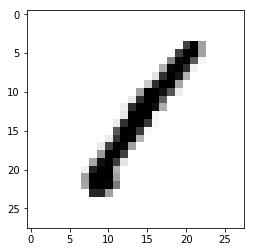

In [34]:
#check a few digits
digit = data[0].reshape(28, 28)
plt.imshow(digit, cmap = plt.cm.binary)
labels[0]

In [70]:
# Scale train and test data from 1 to 0
test = test_data.values

if np.max(data) > 1: data = data / 255
if np.max(test) > 1: test = test / 255
    
# Convert labels to categorical
y = np_utils.to_categorical(labels)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=46)

### Build  MLP models

In [78]:
num_inputs = X_train.shape[1]
num_outputs = y.shape[1]

In [84]:
# MLP model 2 hidden layers
model = Sequential([
    Dense(512, input_dim=num_inputs, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_outputs, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train, y_train,
         batch_size=256,
         epochs=10,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 13s - loss: 0.3684 - acc: 0.8949 - val_loss: 0.1821 - val_acc: 0.9492
Epoch 2/10
 - 5s - loss: 0.1351 - acc: 0.9593 - val_loss: 0.1233 - val_acc: 0.9619
Epoch 3/10
 - 5s - loss: 0.0831 - acc: 0.9747 - val_loss: 0.0909 - val_acc: 0.9725
Epoch 4/10
 - 5s - loss: 0.0534 - acc: 0.9834 - val_loss: 0.0884 - val_acc: 0.9733
Epoch 5/10
 - 5s - loss: 0.0371 - acc: 0.9895 - val_loss: 0.0899 - val_acc: 0.9733
Epoch 6/10
 - 5s - loss: 0.0276 - acc: 0.9919 - val_loss: 0.0867 - val_acc: 0.9739
Epoch 7/10
 - 4s - loss: 0.0172 - acc: 0.9958 - val_loss: 0.0855 - val_acc: 0.9771
Epoch 8/10
 - 5s - loss: 0.0128 - acc: 0.9968 - val_loss: 0.0861 - val_acc: 0.9774
Epoch 9/10
 - 5s - loss: 0.0094 - acc: 0.9976 - val_loss: 0.0861 - val_acc: 0.9779
Epoch 10/10
 - 5s - loss: 0.0070 - acc: 0.9985 - val_loss: 0.0862 - val_acc: 0.9781


In [92]:
# MLP model 3 hidden layers and dropouts
model = Sequential([
    Dense(1024, input_dim=num_inputs, activation='relu'),
    Dropout(0.5),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    
    Dense(num_outputs, kernel_initializer='normal', activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
model.fit(X_train, y_train,
         batch_size=256,
         epochs=10,
         verbose=2,
         validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 25s - loss: 0.5035 - acc: 0.8412 - val_loss: 0.1626 - val_acc: 0.9512
Epoch 2/10
 - 20s - loss: 0.1911 - acc: 0.9404 - val_loss: 0.1234 - val_acc: 0.9620
Epoch 3/10
 - 20s - loss: 0.1504 - acc: 0.9531 - val_loss: 0.1063 - val_acc: 0.9660
Epoch 4/10
 - 23s - loss: 0.1216 - acc: 0.9619 - val_loss: 0.0853 - val_acc: 0.9746
Epoch 5/10
 - 18s - loss: 0.1025 - acc: 0.9683 - val_loss: 0.0869 - val_acc: 0.9756
Epoch 6/10
 - 19s - loss: 0.0850 - acc: 0.9741 - val_loss: 0.0826 - val_acc: 0.9767
Epoch 7/10
 - 27s - loss: 0.0772 - acc: 0.9747 - val_loss: 0.0879 - val_acc: 0.9743
Epoch 8/10
 - 26s - loss: 0.0768 - acc: 0.9747 - val_loss: 0.0821 - val_acc: 0.9763
Epoch 9/10
 - 25s - loss: 0.0656 - acc: 0.9783 - val_loss: 0.0817 - val_acc: 0.9780
Epoch 10/10
 - 22s - loss: 0.0634 - acc: 0.9788 - val_loss: 0.0773 - val_acc: 0.9782


In [94]:
score = model.evaluate(X_test, y_test)
print('Loss: {0}, Accuracy: {1}'.format(score[0], score[1]))

8400/8400 [==============================] - 1s 175us/step
Loss: 0.07729828070178406, Accuracy: 0.9782142857142857


### Build CNN models